In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-shoppers-intention/online_shoppers_intention.csv


# Exploratory Data Analysis
* Understand user behavior, not just statistics
* Identify strong conversion signals
* Prepare stories for feature engineering
* Demonstrate product thinking

## 1. Dataset Overview

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/online-shoppers-intention/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## 2. Target Distribution

In [8]:
df['Revenue'].value_counts(normalize=True)

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

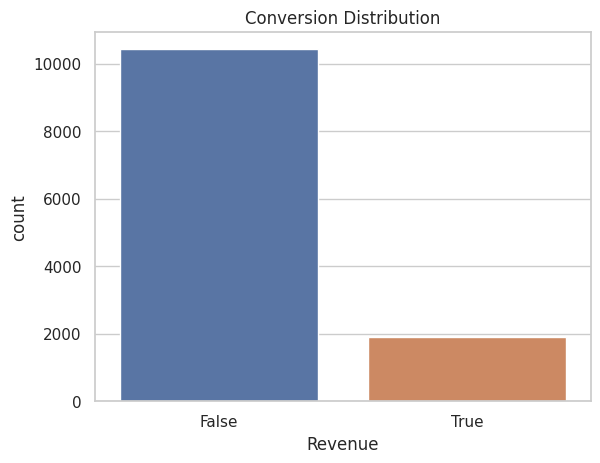

In [9]:
sns.countplot(x='Revenue', data=df)
plt.title("Conversion Distribution")
plt.show()

## 3. Behavioral Features Analysis

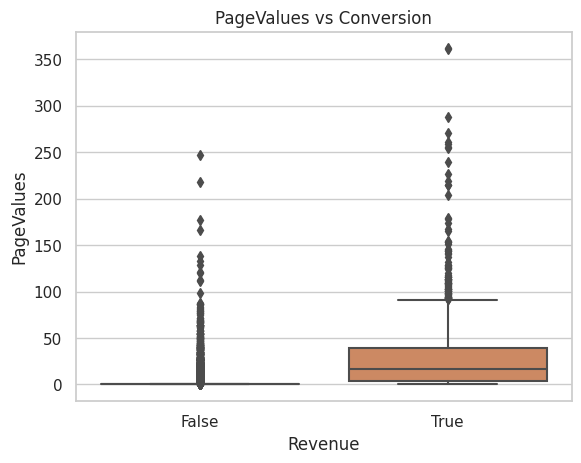

In [10]:
# PageValues vs Revenue
sns.boxplot(x='Revenue', y='PageValues', data=df)
plt.title("PageValues vs Conversion")
plt.show()

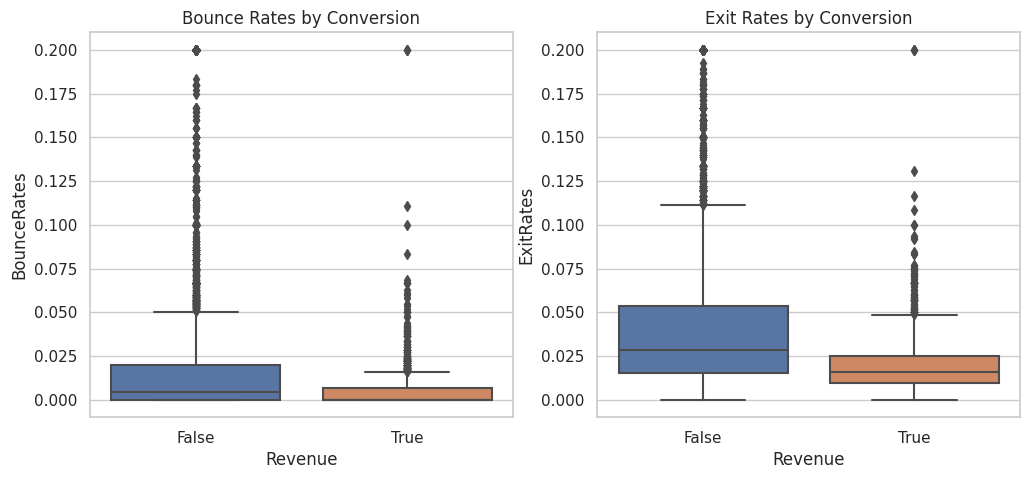

In [11]:
# Bounce & ExitRates
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x='Revenue', y='BounceRates', data=df, ax=axes[0])
sns.boxplot(x='Revenue', y='ExitRates', data=df, ax=axes[1])

axes[0].set_title("Bounce Rates by Conversion")
axes[1].set_title("Exit Rates by Conversion")
plt.show()

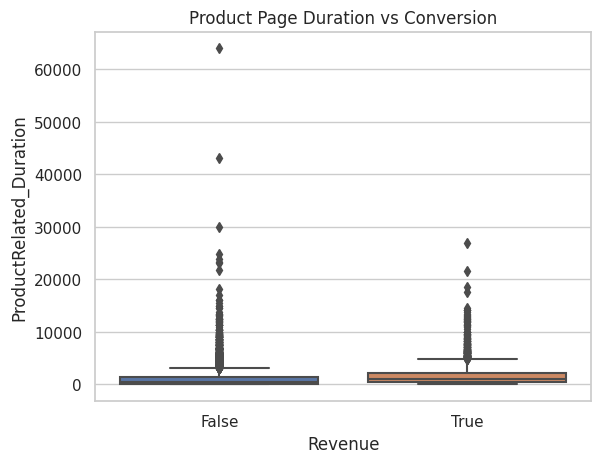

In [12]:
# Duration Features
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.title("Product Page Duration vs Conversion")
plt.show()

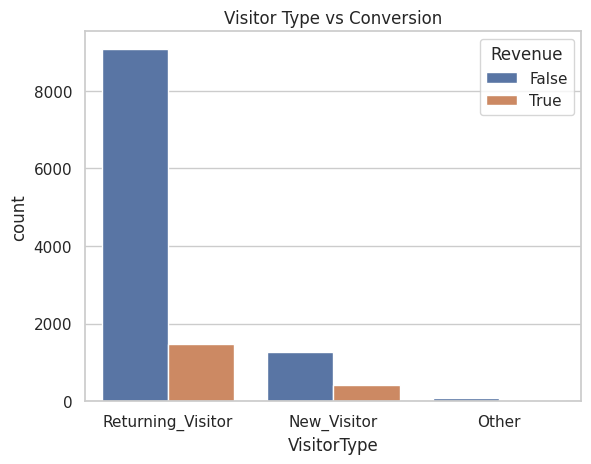

In [13]:
# Categorical Feature Analysis
sns.countplot(x='VisitorType', hue='Revenue', data=df)
plt.title("Visitor Type vs Conversion")
plt.show()

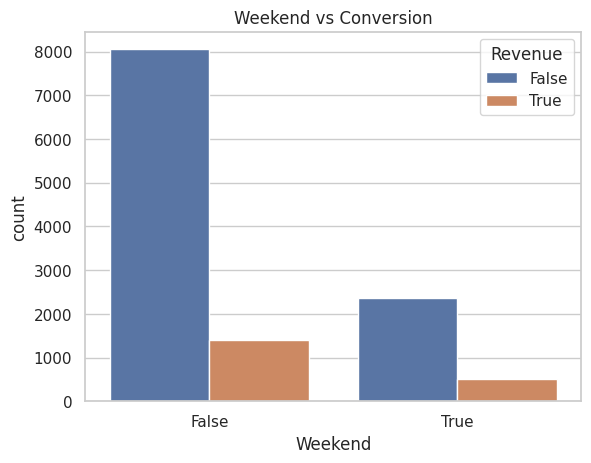

In [14]:
# Weekend
sns.countplot(x='Weekend', hue='Revenue', data=df)
plt.title("Weekend vs Conversion")
plt.show()

**Key Insights**

1. Conversion events are relatively rare, indicating a class imbalance problem.
2. Engagement depth (PageValues, ProductRelated_Duration) is a stronger predictor of conversion than session volume.
3. Bounce and exit rates are negatively correlated with purchase intent.
4. Returning visitors demonstrate higher conversion likelihood.
